# Cutting signals and preprocessing

In [34]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

import signal_processing as sp

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)

In [2]:
PATH = "../data/raw"

In [3]:
files = [file for file in os.listdir(PATH) if file.endswith(".nfc")]
files.sort()
files

['tag1-2.4M-1.nfc',
 'tag1-2.4M-17.1k-1.nfc',
 'tag1-2M-1.nfc',
 'tag1-2M-13.558M-0-16-16-2.nfc',
 'tag1-2M-13.558M-0-16-16.nfc',
 'tag1-2M-13.558M-1.nfc',
 'tag1-2M-13.562M-0-16-16.nfc',
 'tag1-2M-17.1k-0-16-16.nfc',
 'tag1-2M-17.1k.nfc',
 'tag1-2M-2.nfc',
 'tag1-847.5k-1.nfc',
 'tag1-847.5k-17.1k-1.nfc',
 'tag2-2M-1.nfc',
 'tag3-2M-1.nfc']

In [4]:
tag3 = sp.read_signal(os.path.join(PATH, files[13]))

In [5]:
tag3_mag = np.abs(tag3[1])

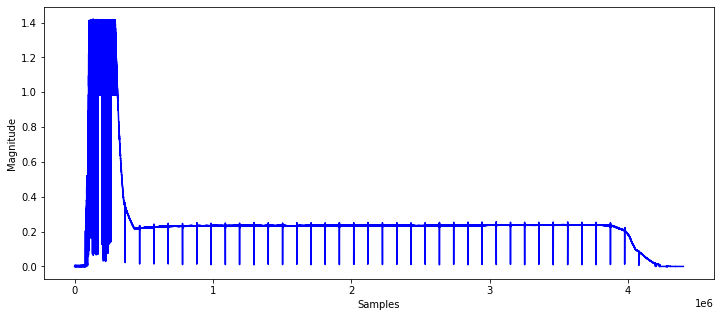

In [35]:
plt.plot(tag3_mag[int(2.7e6):int(7.1e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [29]:
tag3_cut = tag3_mag[int(2.7e6):int(7.1e6)]

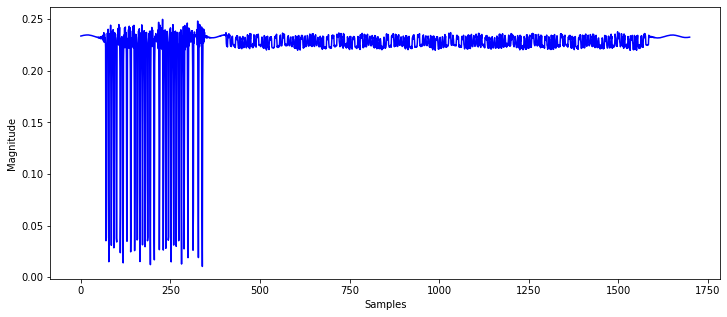

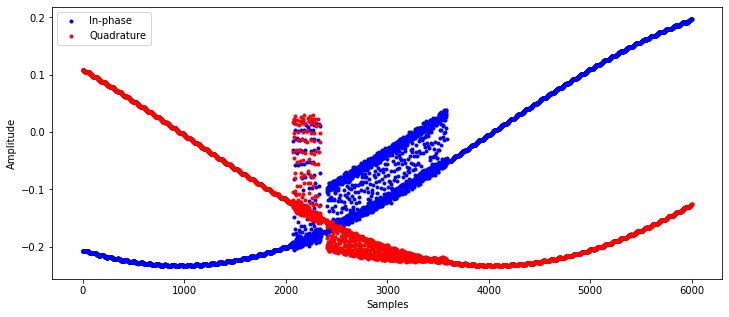

('../data/raw/tag3-2M-1',
 array([6.1242492e-04+4.8066516e-04j, 5.0725247e-04+5.0280726e-04j,
        4.2927047e-04+4.5044036e-04j, ..., 9.1562601e-05+2.4569358e-04j,
        1.9056546e-04-3.4638557e-05j, 6.9436937e-06+7.9997306e-05j],
       dtype=complex64))

In [36]:
plt.plot(tag3_mag[int(3.789e6):int(3.7907e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

plt.plot(np.real(tag3[1][int(3.787e6):int(3.793e6)]), 'b.', label="In-phase")
plt.plot(np.imag(tag3[1][int(3.787e6):int(3.793e6)]), 'r.', label="Quadrature")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(loc="upper left")
plt.show()

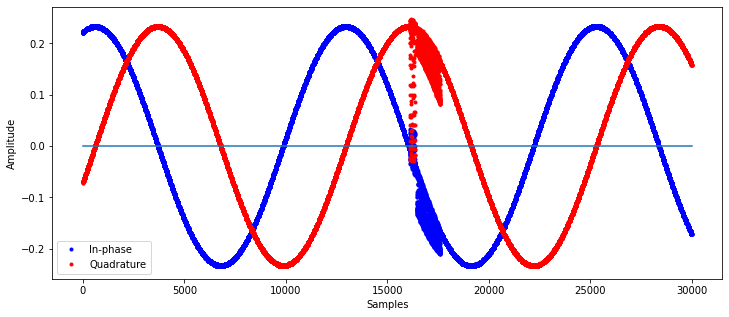

In [44]:
plt.plot(np.real(tag3[1][int(3.67e6):int(3.7e6)]), 'b.', label="In-phase")
plt.plot(np.imag(tag3[1][int(3.67e6):int(3.7e6)]), 'r.', label="Quadrature")
plt.plot([0, 30000], [0.0, 0.0])
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(loc="lower left")
plt.show()

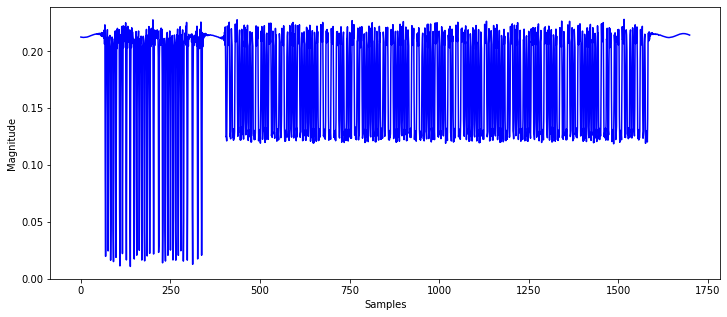

In [37]:
tag2 = sp.read_signal(os.path.join(PATH, files[12]))
tag2_mag = np.abs(tag2[1])

plt.plot(tag2_mag[int(6.4452e6):int(6.4469e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [34]:
tag3_single = tag3_mag[int(3.789e6):int(3.7907e6)]

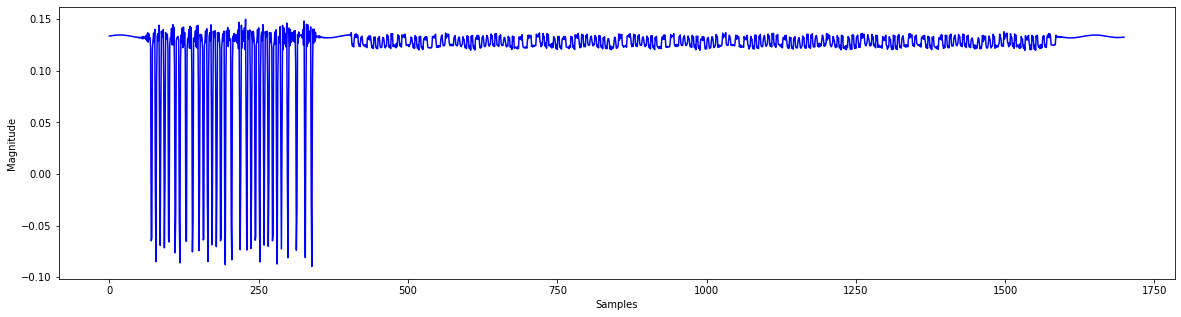

In [59]:
plt.plot(sp.shift_down(tag3_single, 0.1), 'b-')
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

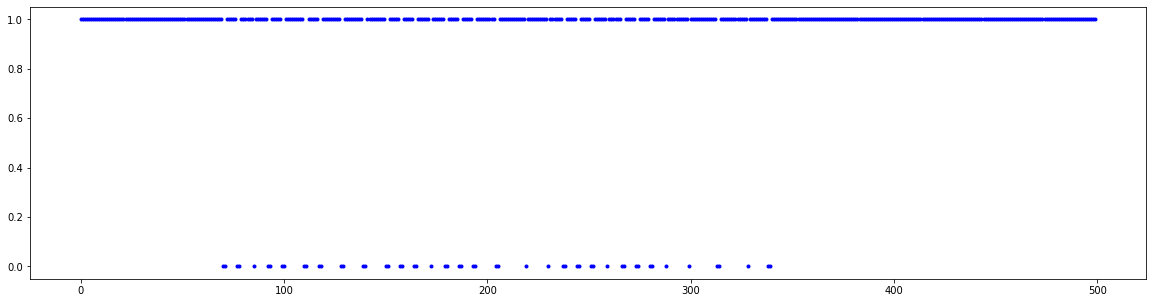

In [36]:
tag3_single_shifted = sp.shift_down(tag3_single, 0.1)
plt.plot(sp.binary_slicer(tag3_single_shifted[0:500]), 'b.')
plt.show()

In [56]:
tag3_single_miller = sp.binary_slicer(tag3_single_shifted[0:500])

In [55]:
''.join(tag3_single_miller.astype(str))

'11111111111111111111111111111111111111111111111111111111111111111111110011111001111110111111001111100111111111001111100111111111001111111110011111111100111110011111001111110111111001111100111110011111111100111111111111101111111111011111100111110011111001111110111111001111100111110011111101111111111011111111111110011111111111110111111111001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111'

In [57]:
sp.write_signal_to_file(tag3_single_miller, "tag3_single_miller.bin")

In [60]:
# Crazy try to decode Miller manually
bs = '01111110111111001111100111111111001111100111111111001111111110011111111100111110011111001111110111111001111100111110011111111100111111111111101111111111011111100111110011111001111110111111001111100111110011111101111111111011111111111110011111111111110111111111001111'
n = 4
separated = [bs[x:x+n] for x in range(0, len(bs), n)]
print(separated)
symbols = {
    '1101': 1,
    '1111': 0,
    '0111': 0
}

substituted = [symbol[x] if x in symbols.keys() else 99 for x in separated]
print(substituted)

['0111', '1110', '1111', '1100', '1111', '1001', '1111', '1111', '0011', '1110', '0111', '1111', '1100', '1111', '1111', '1001', '1111', '1111', '0011', '1110', '0111', '1100', '1111', '1101', '1111', '1001', '1111', '0011', '1110', '0111', '1111', '1100', '1111', '1111', '1111', '1011', '1111', '1111', '0111', '1110', '0111', '1100', '1111', '1001', '1111', '1011', '1111', '0011', '1110', '0111', '1100', '1111', '1101', '1111', '1111', '1011', '1111', '1111', '1110', '0111', '1111', '1111', '1101', '1111', '1111', '0011', '11']
[0, 99, 0, 99, 0, 99, 0, 0, 99, 99, 0, 0, 99, 0, 0, 99, 0, 0, 99, 99, 0, 99, 0, 1, 0, 99, 0, 99, 99, 0, 0, 99, 0, 0, 0, 99, 0, 0, 0, 99, 0, 99, 0, 99, 0, 99, 0, 99, 99, 0, 99, 0, 1, 0, 0, 99, 0, 0, 99, 0, 0, 0, 1, 0, 0, 99, 99]


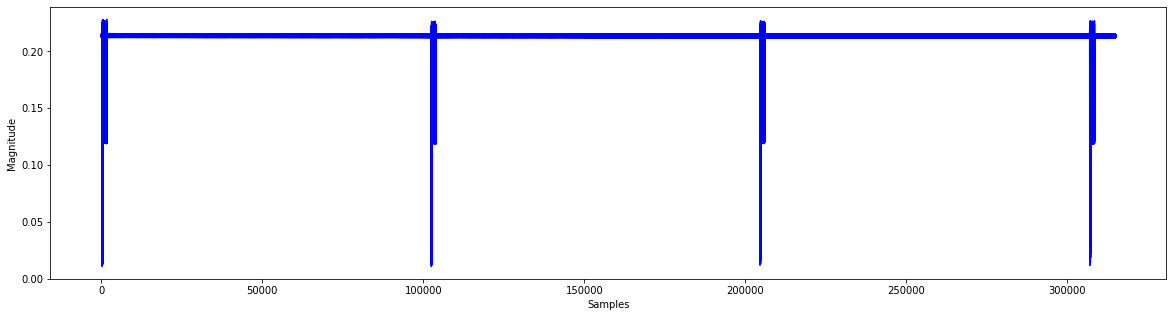

In [59]:
plt.plot(tag2_mag[int(6.445e6):int(6.76e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

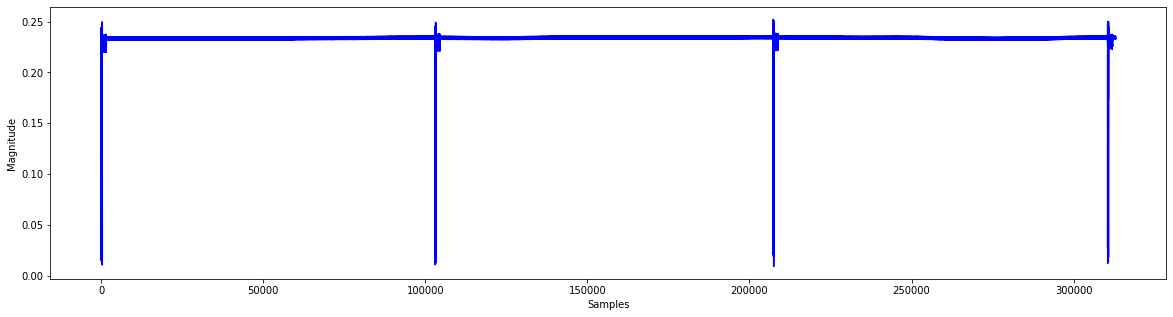

In [58]:
plt.plot(tag3_mag[int(3.789e6):int(4.102e6)], 'b-',)

plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()